### Predicting Youth Risk Behaviors: Modeling the YRBSS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
%config InlineBackend.figure_format ='retina'


In [2]:
colors = ['#b166eb', '#8858D4', '#664CC1', '#4B43B2', '#072B8B']
sns.set_palette(colors)


In [3]:
df = pd.read_csv('data/SADCQ.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504249 entries, 0 to 504248
Columns: 151 entries, sitecode to qtransgender
dtypes: float64(142), int64(6), object(3)
memory usage: 580.9+ MB


In [5]:
# Make record # the index

df.set_index('record', inplace=True)

In [6]:
df

,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,age,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
record,,,,,,,,,,,,,,,,,,,,,
3972,CH,"Chicago, IL (CH)",District,1,1991,1,76.736100,1,14,1.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7364,CH,"Chicago, IL (CH)",District,1,1991,1,58.487169,1,39,4.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7365,CH,"Chicago, IL (CH)",District,1,1991,1,40.119000,1,29,4.0,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7366,CH,"Chicago, IL (CH)",District,1,1991,1,72.243300,1,28,4.0,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9648,CH,"Chicago, IL (CH)",District,1,1991,1,73.372100,1,4,5.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226519,ST,"Shelby County, TN (ST)",District,1,2019,15,16.504785,12,1,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2226522,ST,"Shelby County, TN (ST)",District,1,2019,15,9.973000,12,1,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2226521,ST,"Shelby County, TN (ST)",District,1,2019,15,16.504785,12,1,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.sexid2.value_counts()

1.0    200964
2.0     26101
3.0     12892
Name: sexid2, dtype: int64

In [7]:
cols = df.columns.tolist()
cols

['sitecode',
 'sitename',
 'sitetype',
 'sitetypenum',
 'year',
 'survyear',
 'weight',
 'stratum',
 'PSU',
 'age',
 'sex',
 'grade',
 'race4',
 'race7',
 'stheight',
 'stweight',
 'bmi',
 'bmipct',
 'qnobese',
 'qnowt',
 'q66',
 'q65',
 'sexid',
 'sexid2',
 'sexpart',
 'sexpart2',
 'q8',
 'q9',
 'q10',
 'q11',
 'q12',
 'q13',
 'q14',
 'q15',
 'q16',
 'q17',
 'q18',
 'q19',
 'q20',
 'q21',
 'q22',
 'q23',
 'q24',
 'q25',
 'q26',
 'q27',
 'q28',
 'q29',
 'q30',
 'q31',
 'q32',
 'q33',
 'q34',
 'q35',
 'q36',
 'q37',
 'q38',
 'q39',
 'q40',
 'q41',
 'q42',
 'q43',
 'q44',
 'q45',
 'q46',
 'q47',
 'q48',
 'q49',
 'q50',
 'q51',
 'q52',
 'q53',
 'q54',
 'q55',
 'q56',
 'q57',
 'q58',
 'q59',
 'q60',
 'q61',
 'q62',
 'q63',
 'q64',
 'q67',
 'q68',
 'q69',
 'q70',
 'q71',
 'q72',
 'q73',
 'q74',
 'q75',
 'q76',
 'q77',
 'q78',
 'q79',
 'q80',
 'q81',
 'q82',
 'q83',
 'q84',
 'q85',
 'q86',
 'q87',
 'q88',
 'q89',
 'qbikehelmet',
 'qdrivemarijuana',
 'qcelldriving',
 'qpropertydamage',
 'qbul

In [8]:
# Just keep 2009 - 2019

df = df[df['year']>=2009]

In [9]:
piv = df.pivot_table(columns='year', aggfunc=len, fill_value=0)
piv

year,2009,2011,2013,2015,2017,2019
PSU,50964,51038,43482,43286,50490,56770
age,50964,51038,43482,43286,50490,56770
bmi,50964,51038,43482,43286,50490,56770
bmipct,50964,51038,43482,43286,50490,56770
grade,50964,51038,43482,43286,50490,56770
...,...,...,...,...,...,...
stheight,50964,51038,43482,43286,50490,56770
stratum,50964,51038,43482,43286,50490,56770
stweight,50964,51038,43482,43286,50490,56770
survyear,50964,51038,43482,43286,50490,56770


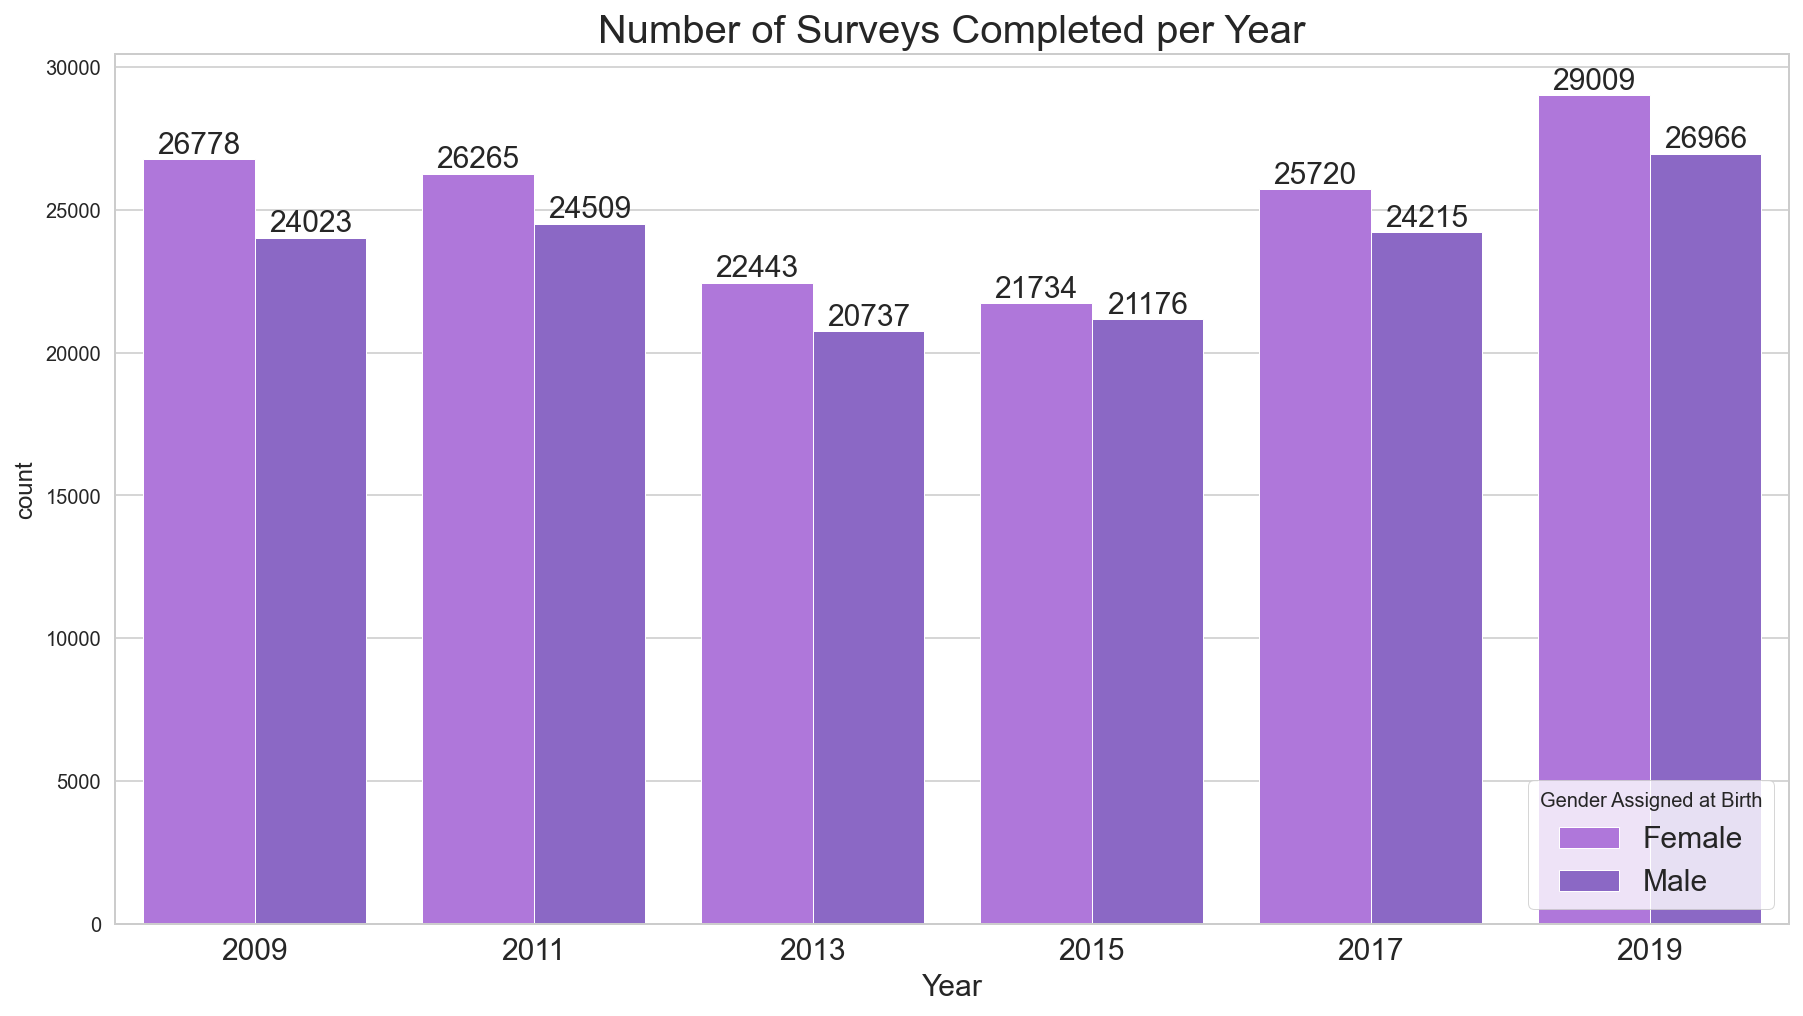

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df, x='year', hue='sex', palette=colors, ax=ax)

ax.bar_label(ax.containers[0], fontsize=15, fmt='%d')
ax.bar_label(ax.containers[1], fontsize=15, fmt='%d')

ax.set_title('Number of Surveys Completed per Year', fontsize=20)
ax.set_xticklabels(labels=[2009, 2011, 2013, 2015, 2017, 2019], fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.legend(title='Gender Assigned at Birth', labels=['Female', 'Male'], loc='lower right', fontsize=15);


In [11]:
age_dict = {1: '12 yrs -', 2: '13 yrs', 3: '14 yrs', 
           4: '15 yrs', 5: '16 yrs', 6: '17 yrs', 7: '18 yrs +'}

In [12]:
age_labels = [v for k, v in age_dict.items()]
age_labels

['12 yrs -', '13 yrs', '14 yrs', '15 yrs', '16 yrs', '17 yrs', '18 yrs +']

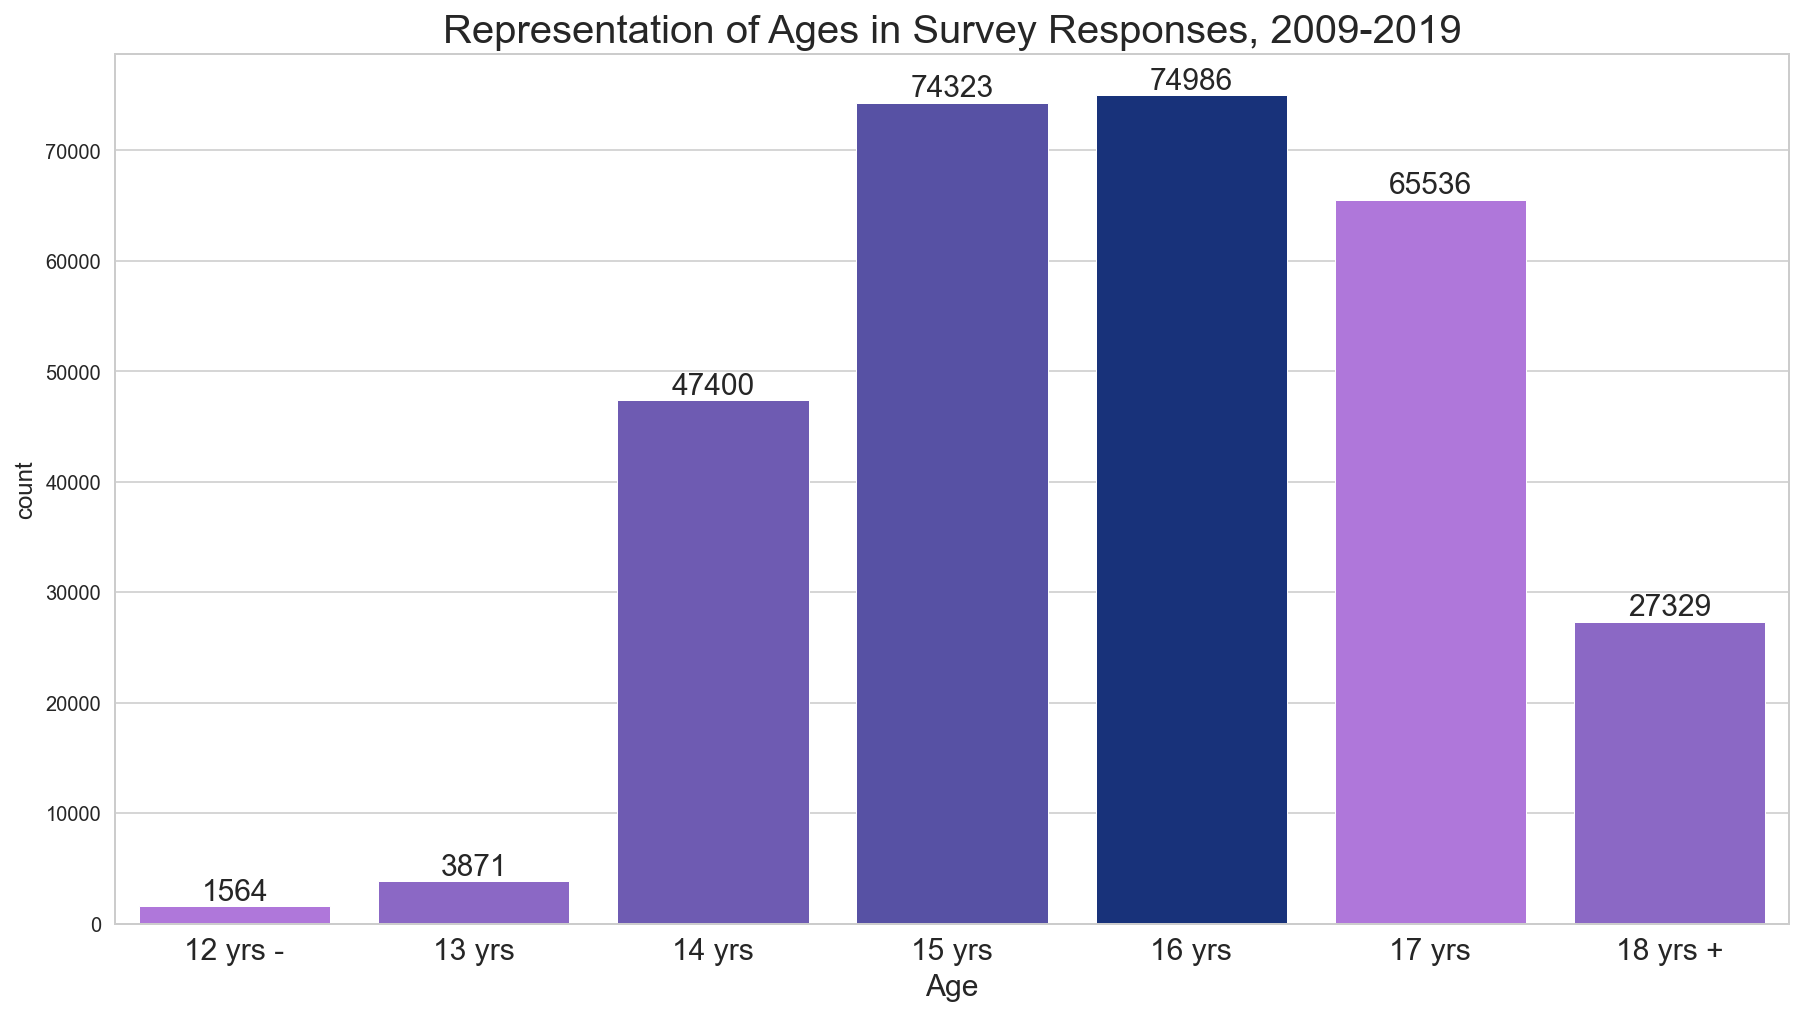

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df, x='age', palette=colors, ax=ax)
ax.set_xticklabels(labels=age_labels, fontsize=15)
ax.set_title('Representation of Ages in Survey Responses, 2009-2019', fontsize=20)
ax.bar_label(ax.containers[0], fontsize=15, fmt='%d')
ax.set_xlabel('Age', fontsize=15);

In [14]:
df.head()

,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,age,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
record,,,,,,,,,,,,,,,,,,,,,
3961,CC,"Clark County, NV (CC)",District,1,2009,10,37.210800,5,3,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
7354,CC,"Clark County, NV (CC)",District,1,2009,10,37.067600,14,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
11894,CC,"Clark County, NV (CC)",District,1,2009,10,73.895100,17,1,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
15058,CC,"Clark County, NV (CC)",District,1,2009,10,6.100596,35,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
20708,CC,"Clark County, NV (CC)",District,1,2009,10,104.764939,15,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [15]:
df.sex.unique()

array([nan,  2.,  1.])

In [16]:
race7_dict = {1: 'AmInd/AlaskaNat', 2: 'Asian', 3: 'Black or Af Am', 
             4: 'Hisp/Latinx', 5: 'NatHaw/OtherPacIsl', 6: 'White', 7: 'Multiple Races (Non-Hisp)'}

In [17]:
race7_labels = ['Hisp/Latinx', 'Black or Af Am', 
               'White', 'Asian', 'Multiple Races', 
               'NatHaw/OtherPacIsl', 'AmInd/AlaskaNat']

In [18]:
df.race7.value_counts()

4.0    116129
3.0     72271
6.0     48708
2.0     29159
7.0     11937
5.0      3505
1.0      3101
Name: race7, dtype: int64

In [19]:
race7_labels

['Hisp/Latinx',
 'Black or Af Am',
 'White',
 'Asian',
 'Multiple Races',
 'NatHaw/OtherPacIsl',
 'AmInd/AlaskaNat']

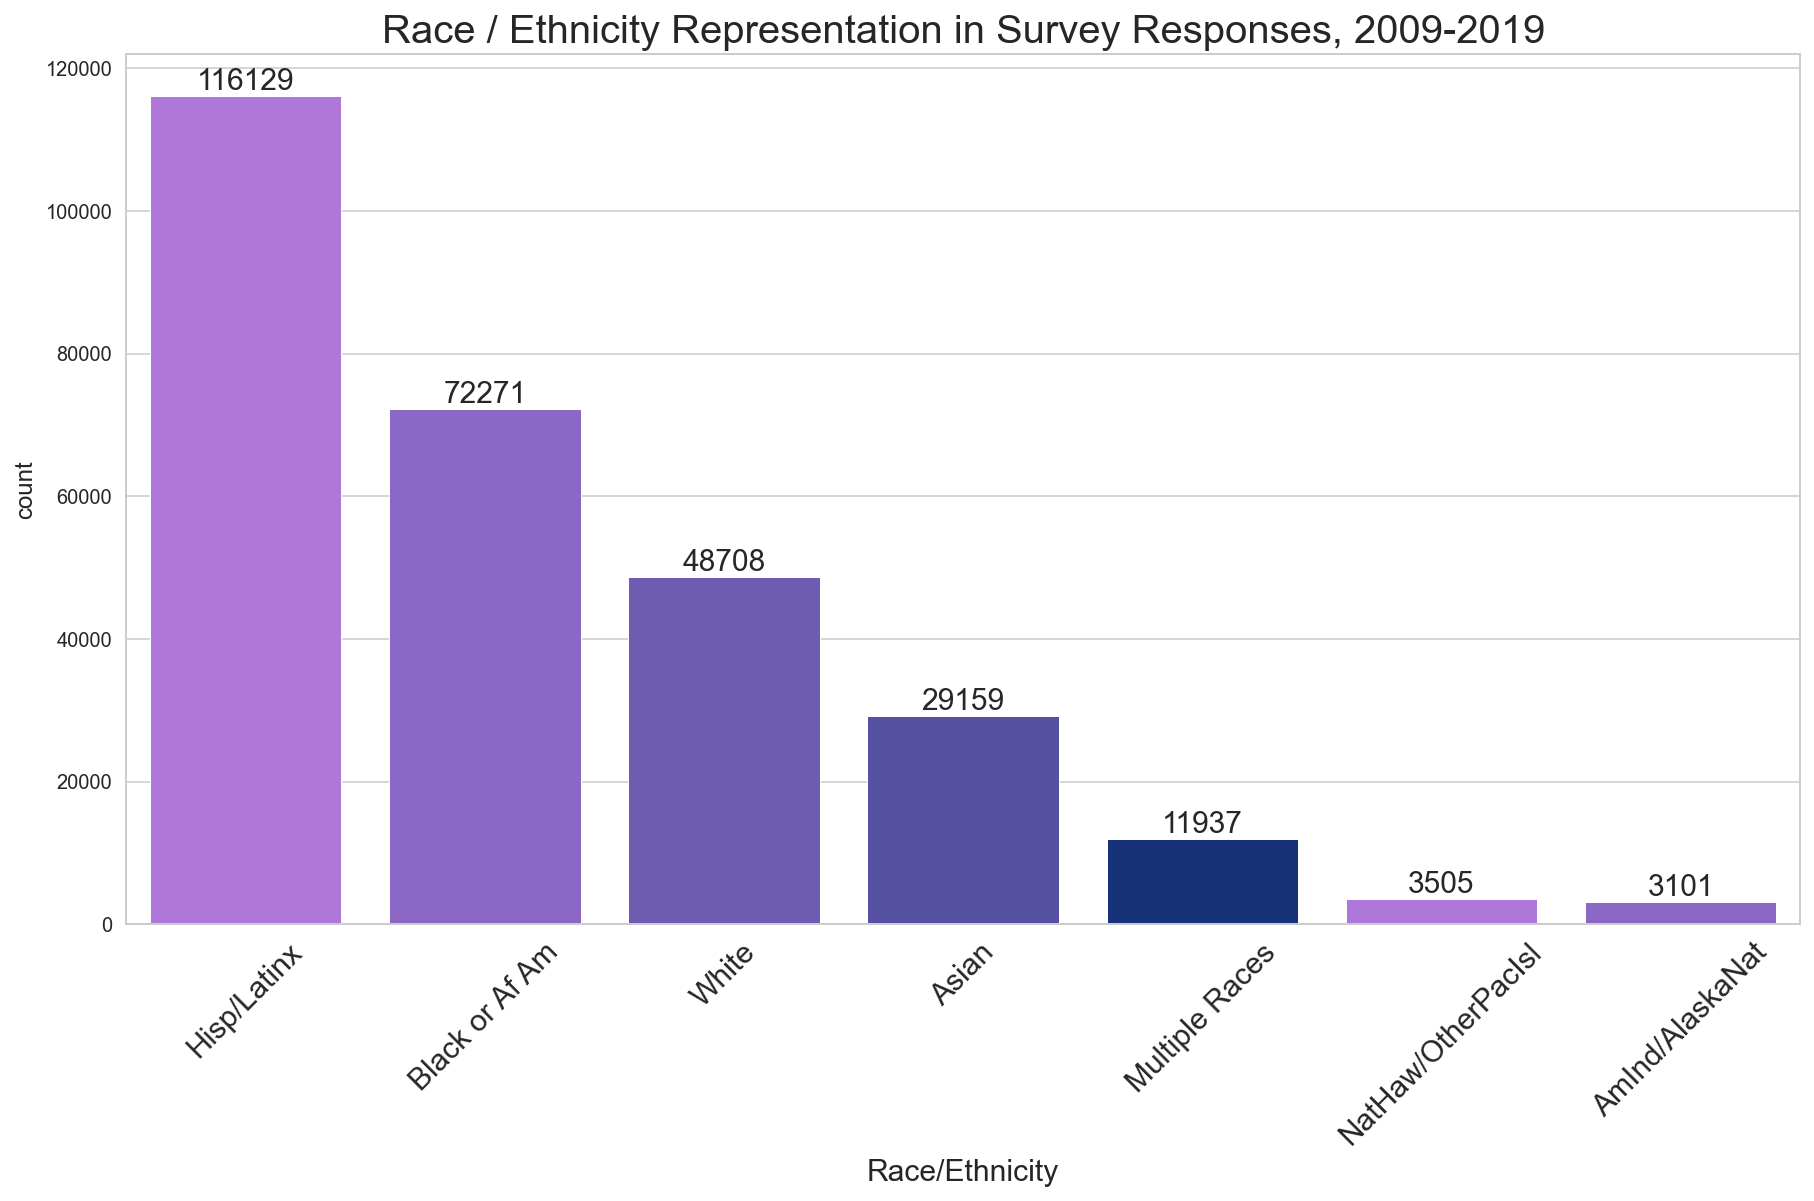

In [20]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df, x='race7', palette=colors, ax=ax, 
             order=df.race7.value_counts().index)
ax.set_xticklabels(labels=race7_labels, rotation=45, fontsize=15)
ax.set_title('Race / Ethnicity Representation in Survey Responses, 2009-2019', fontsize=20)
ax.bar_label(ax.containers[0], fontsize=15, fmt='%d')
ax.set_xlabel('Race/Ethnicity', fontsize=15);

In [21]:
df.grade.value_counts()

1.0    79141
2.0    77787
3.0    70676
4.0    64129
Name: grade, dtype: int64

In [22]:
grade_labels = ['9th', '10th', '11th', '12th']

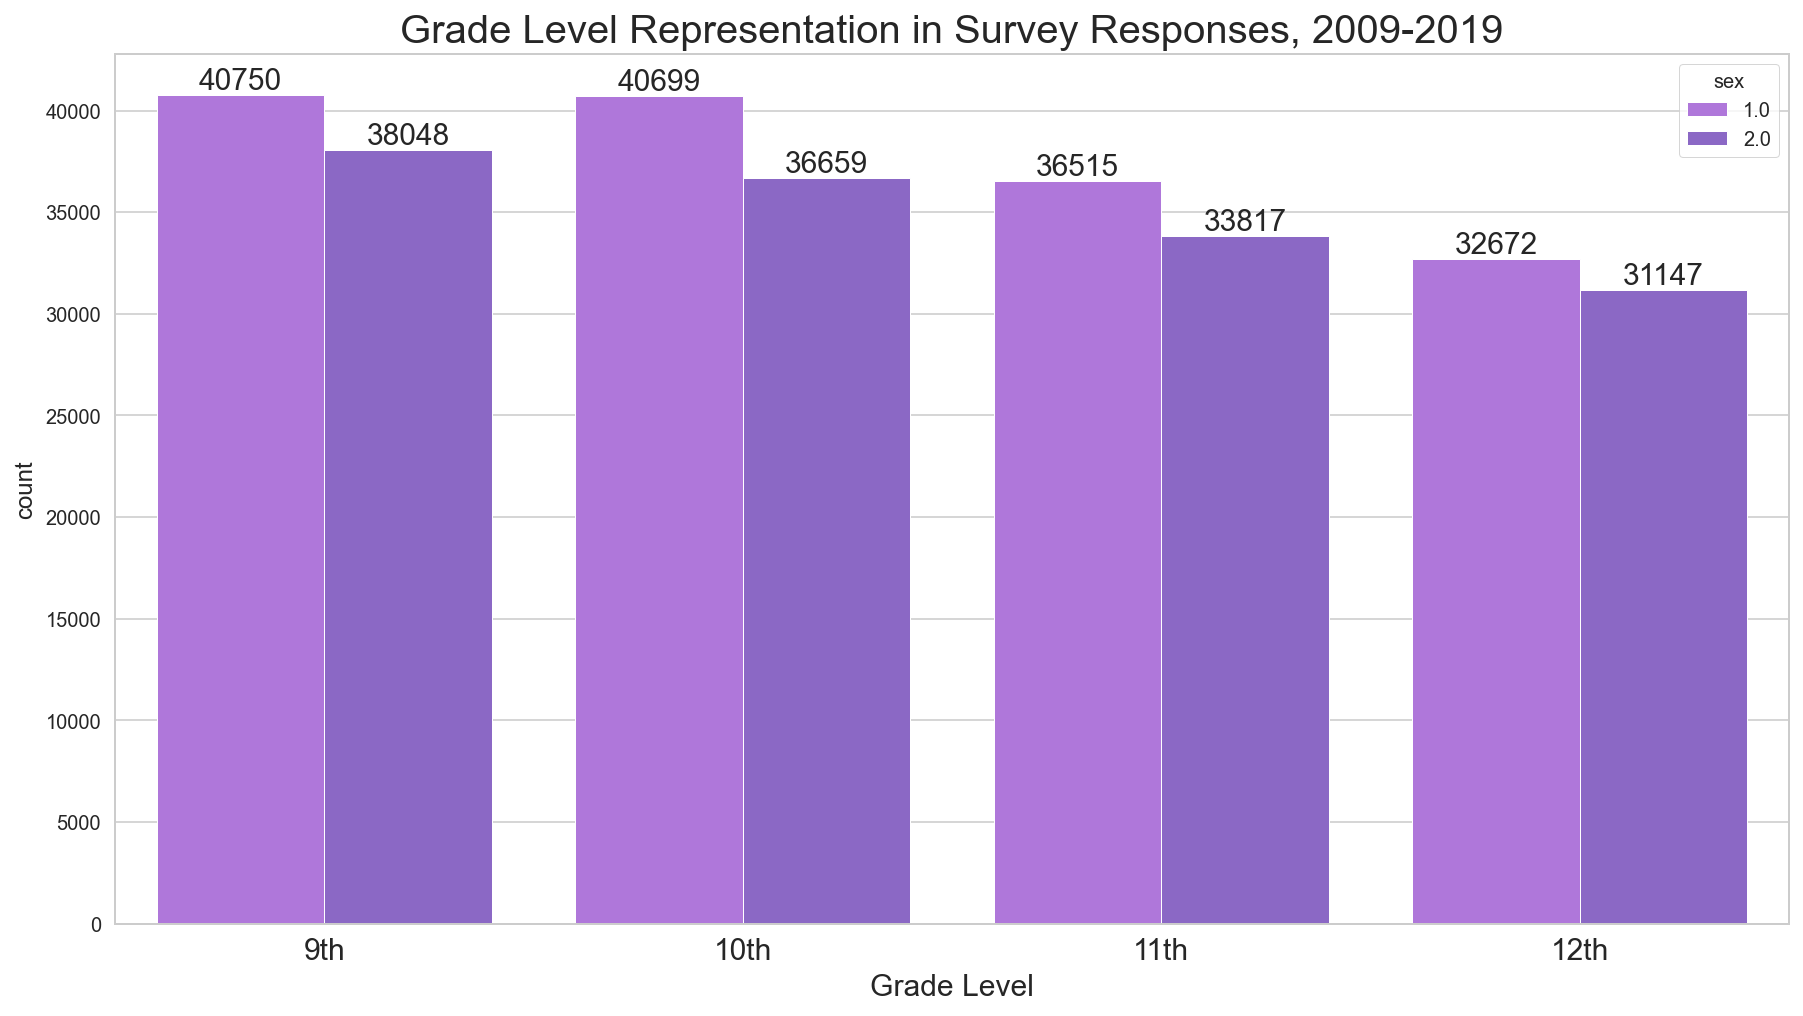

In [23]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df, x='grade', hue='sex', palette=colors, ax=ax)
ax.set_xticklabels(labels=grade_labels, fontsize=15)
ax.set_title('Grade Level Representation in Survey Responses, 2009-2019', fontsize=20)
ax.bar_label(ax.containers[0], fontsize=15, fmt='%d')
ax.bar_label(ax.containers[1], fontsize=15, fmt='%d')

ax.set_xlabel('Grade Level', fontsize=15);

In [24]:
sex_dict = {1: 'Female', 2: 'Male'}

In [25]:
df.grade.unique()

array([ 2., nan,  3.,  1.,  4.])

In [26]:
grade_dict = {1: '9th Grade', 2: '10th Grade', 3: '11th Grade', 
             4: '12th Grade'}

In [27]:
df.race4.unique()

array([nan,  1.,  3.,  2.,  4.])

In [28]:
race4_dict = {1: 'White', 2: 'Black or Af Am', 3: 'Hisp/Latinx', 4: 'All Other Races'}

In [29]:
df.race7.unique()

array([nan,  6.,  4.,  3.,  5.,  2.,  7.,  1.])

In [30]:
race7_dict = {1: 'AmInd/AlaskaNat', 2: 'Asian', 3: 'Black or Af Am', 
             4: 'Hisp/Latinx', 5: 'NatHaw/OtherPacIsl', 6: 'White', 7: 'Multiple Races (Non-Hisp)'}

In [31]:
# How tall are you without your shoes on
df.stheight.unique()

array([       nan, 1.75      , 1.73      , 1.7       , 1.9       ,
       1.67999905, 1.62999905, 1.78      , 1.65      , 1.54999905,
       1.83      , 1.59999905, 1.79999905, 1.37      , 1.57      ,
       1.87999905, 1.51999905, 1.84999905, 1.92999905, 1.45      ,
       1.95999905, 2.02999809, 1.5       , 1.41999905, 1.46999905,
       1.26999905, 1.34999905, 1.29999905, 2.10999809, 1.98      ,
       2.06      , 1.4       , 1.32      , 2.00999809, 2.08      ,
       1.21999905, 1.13999905, 1.24      ])

In [32]:
# How much do you weigh wo your shoes on? 
df.stweight.unique()

array([         nan,  72.57993896,  58.96996948,  60.33      ,
        65.76993896,  84.81993896,  59.87996948,  49.9       ,
        51.25996948,  83.92      ,  54.43      , 124.29      ,
        53.06996948, 106.6       ,  97.06993896,  63.5       ,
        56.25      ,  52.15996948,  64.86      ,  78.93      ,
        70.31      ,  76.19993896,  58.50996948,  56.69996948,
        48.99      ,  75.3       ,  68.04      ,  48.53996948,
        89.36      ,  78.01993896,  50.8       ,  47.62996948,
        58.06      ,  55.34      , 113.39993896,  74.83993896,
        45.36      ,  77.11      ,  66.23      ,  43.09      ,
        65.31993896, 101.61      ,  61.24      ,  57.61      ,
        99.33993896,  50.34996948,  44.44996948,  44.        ,
        68.49      ,  53.97996948,  68.94993896,  82.56      ,
       120.66      ,  48.08      ,  70.75993896,  88.44993896,
       109.76993896,  60.78      ,  69.39993896,  75.75      ,
        49.43996948,  61.68996948,  72.12      , 117.93

In [33]:
len(df.bmi.unique())

5235

In [34]:
len(df.bmipct.unique())

23388

In [35]:
# Obesity Indicator
df.qnobese.unique()

array([nan,  2.,  1.])

In [36]:
# Overweight Indicator
df.qnowt.unique()

array([nan,  1.,  2.])

In [37]:
df.q26.value_counts(normalize=True)

2.0    0.849515
1.0    0.150485
Name: q26, dtype: float64

#### Data Cleaning for Target 1: <br>
Question 58: Have you ever had sexual intercourse? <br>
(Source for cleaning steps: https://www.tableau.com/learn/articles/what-is-data-cleaning)

In [38]:
df

,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,age,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
record,,,,,,,,,,,,,,,,,,,,,
3961,CC,"Clark County, NV (CC)",District,1,2009,10,37.210800,5,3,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
7354,CC,"Clark County, NV (CC)",District,1,2009,10,37.067600,14,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
11894,CC,"Clark County, NV (CC)",District,1,2009,10,73.895100,17,1,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
15058,CC,"Clark County, NV (CC)",District,1,2009,10,6.100596,35,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
20708,CC,"Clark County, NV (CC)",District,1,2009,10,104.764939,15,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226519,ST,"Shelby County, TN (ST)",District,1,2019,15,16.504785,12,1,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2226522,ST,"Shelby County, TN (ST)",District,1,2019,15,9.973000,12,1,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2226521,ST,"Shelby County, TN (ST)",District,1,2019,15,16.504785,12,1,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Replace 2's (No's...) with 0s so that 1 (Yes) is the positive class
df.q58.replace(to_replace={2.: 0}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [160]:
df.sitename.unique()

array(['Clark County, NV (CC)', 'Chicago, IL (CH)',
       'Charlotte-Mecklenburg County, NC (CM)', 'Dallas, TX (DA)',
       'Duval County, FL (DU)', 'Broward County, FL (FT)',
       'Los Angeles, CA (LO)', 'Milwaukee, WI (ML)',
       'Miami-Dade County, FL (MM)', 'New York City, NY (NYC)',
       'Borough of Bronx, NY (NYG)', 'Borough of Brooklyn, NY (NYH)',
       'Borough of Manhattan, NY (NYI)', 'Borough of Queens, NY (NYJ)',
       'Borough of Staten Island, NY (NYK)', 'Orange County, FL (OL)',
       'Palm Beach County, FL (PB)', 'Philadelphia, PA (PH)',
       'San Diego, CA (SA)', 'San Bernardino, CA (SB)',
       'Seattle, WA (SE)', 'San Francisco, CA (SF)', 'Cleveland, OH (CE)',
       'Fort Worth, TX (FW)', 'Oakland, CA (OA)',
       'Shelby County, TN (ST)', 'Albuquerque, NM (AB)',
       'Eaton Consortium, MI (EA)', 'Genesee Consortium, MI (GE)',
       'Gaston County, NC (GS)', 'Hillsborough County, FL (HL)',
       'Newark, NJ (NW)', 'Portland, OR (PO)', 'Pasco County

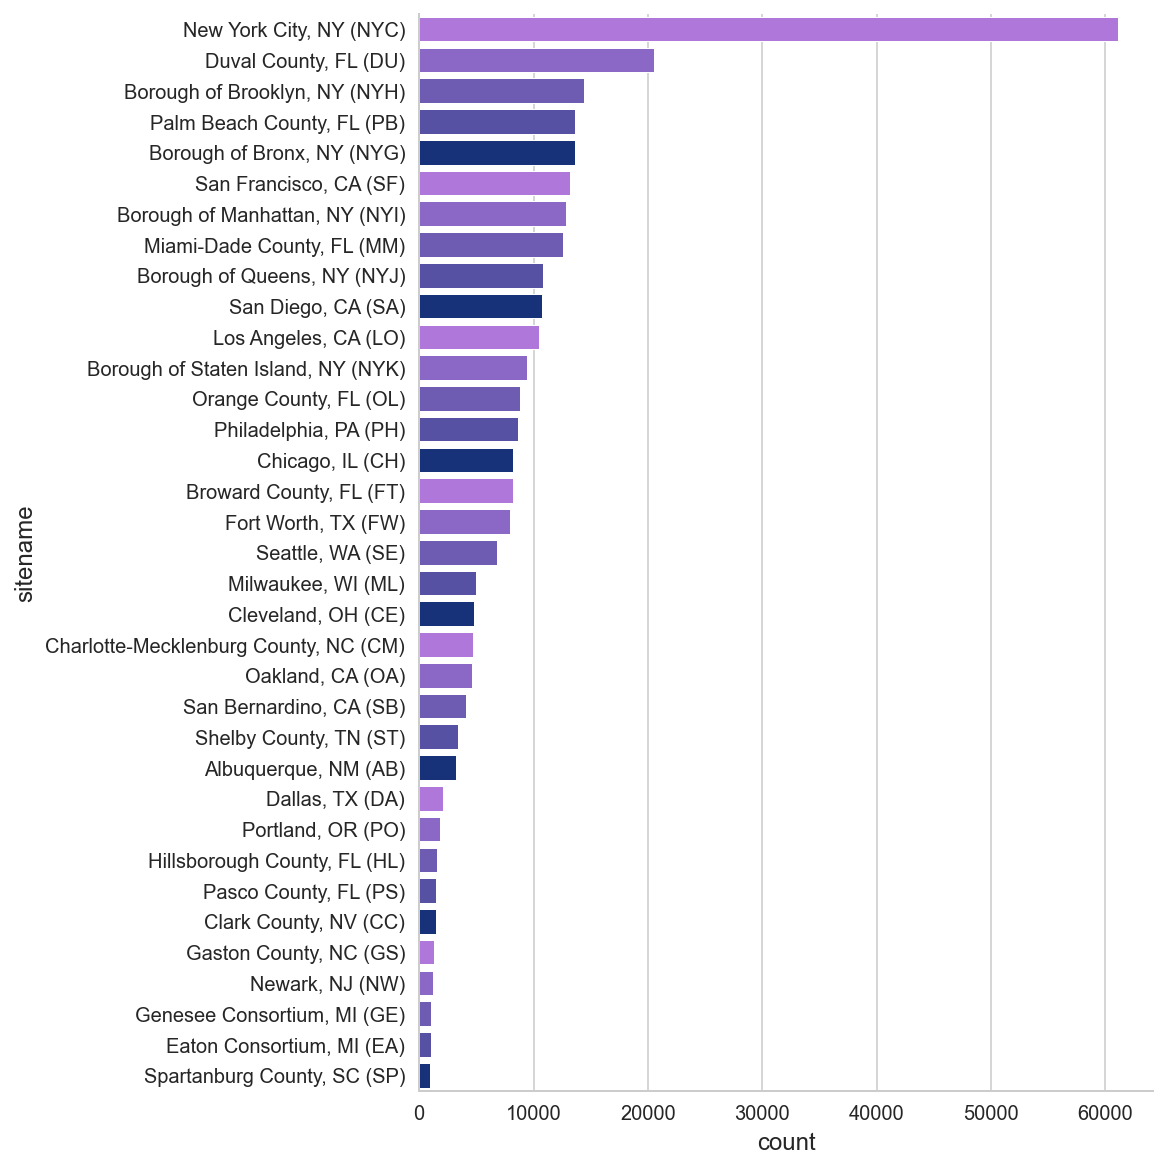

In [129]:
g = sns.catplot(data=df, y='sitename', kind='count', palette=colors, order=df['sitename'].value_counts().index, 
           height=8)

In [ ]:
# Step 1: Manually Removing Features

In [165]:
sex_df = df.copy()

In [166]:
df.race4.isnull().sum(), df.race7.isnull().sum()

(11220, 11220)

In [167]:
# Step 1a : Remove Irrelevant features

to_drop = ['sitecode', 'race4',
 'sitetype',
 'sitetypenum',
 'survyear',
 'weight',
 'stratum',
 'PSU',
 'stheight',
 'stweight',
 'bmipct',
 'qnobese',
 'qnowt',
 'q66',
 'q65',
 'sexid',
 'sexid2',
 'sexpart',
 'sexpart2',
 'q59',
 'q60',
 'q61',
 'q62',
 'q63',
 'q64',
 'q84',
 'q85',
 'qbikehelmet',
 'qdrivemarijuana',
 'qcelldriving',
 'qpropertydamage',
 'qbullyweight',
 'qbullygender',
 'qbullygay',
 'qchokeself',
 'qcigschool',
 'qchewtobschool',
 'qalcoholschool',
 'qtypealcohol2',
 'qhowmarijuana',
 'qmarijuanaschool',
 'qcurrentopioid',
 'qcurrentcocaine',
 'qcurrentheroin',
 'qcurrentmeth',
 'qhallucdrug',
 'qprescription30d',
 'qgenderexp',
 'qtaughtHIV',
 'qtaughtsexed',
 'qtaughtstd',
 'qtaughtcondom',
 'qtaughtbc',
 'qdietpop',
 'qcoffeetea',
 'qsportsdrink',
 'qenergydrink',
 'qsugardrink',
 'qwater',
 'qfastfood',
 'qfoodallergy',
 'qwenthungry',
 'qmusclestrength',
 'qsunscreenuse',
 'qindoortanning',
 'qsunburn',
 'qconcentrating',
 'qcurrentasthma',
 'qwheresleep',
 'qspeakenglish',
 'qtransgender']

In [168]:
sex_df.drop(columns=to_drop, inplace=True)

In [ ]:
# Step 1b. Remove Features with High NaNs

In [169]:
to_drop_nans = ['q10', 'q11', 'q14', 'q19', 'q20', 'q21', 'q22', 
               'q31', 'q34', 'q35', 'q36', 'q37', 'q39', 'q42', 'q43', 
               'q44', 'q48', 'q49', 'q71', 'q72', 'q73', 
               'q74', 'q75', 'q76', 'q77', 'q78', 'q80', 
               'q83', 'q86', 'q88', 'q89']

In [170]:
sex_df.drop(columns=to_drop_nans, inplace=True)

In [173]:
sex_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296030 entries, 3961 to 2226523
Data columns (total 48 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   sitename  296030 non-null  object 
 1   year      296030 non-null  int64  
 2   age       295009 non-null  float64
 3   sex       293575 non-null  float64
 4   grade     291733 non-null  float64
 5   race7     284810 non-null  float64
 6   bmi       266288 non-null  float64
 7   q8        182785 non-null  float64
 8   q9        168531 non-null  float64
 9   q12       275188 non-null  float64
 10  q13       261271 non-null  float64
 11  q15       285562 non-null  float64
 12  q16       288658 non-null  float64
 13  q17       279400 non-null  float64
 14  q18       184517 non-null  float64
 15  q23       286648 non-null  float64
 16  q24       237421 non-null  float64
 17  q25       288586 non-null  float64
 18  q26       288327 non-null  float64
 19  q27       160661 non-null  float64
 20  

In [174]:
# Step 1c: Remove Highly Correlated Features
corr = sex_df.corr()

<AxesSubplot:>

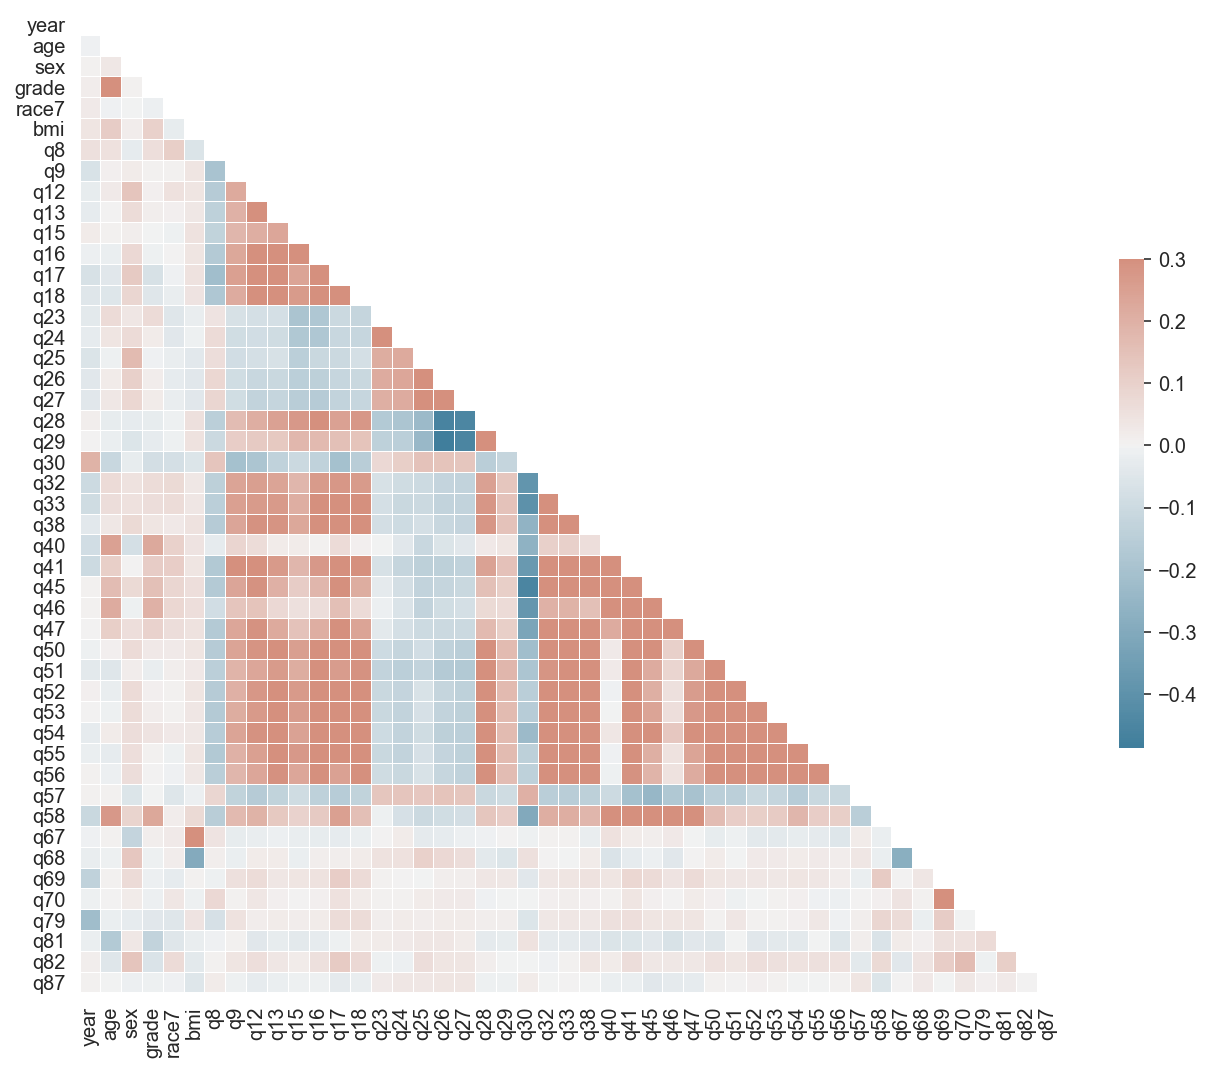

In [175]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [176]:
# More corr features are different enough to keep in for prediction
corr.q58.sort_values(ascending=False)

q58      1.000000
q45      0.437837
q46      0.398311
q47      0.337321
q41      0.320514
q40      0.305957
age      0.272602
q17      0.248358
grade    0.228003
q33      0.209759
q32      0.208268
q12      0.195010
q38      0.186315
q54      0.183802
q9       0.172227
q50      0.162743
q18      0.158547
q28      0.131196
q13      0.125294
q16      0.122857
q53      0.121747
q69      0.120062
q55      0.112554
q29      0.112247
q51      0.110767
q52      0.109339
q56      0.108958
q15      0.095045
sex      0.093032
q79      0.083527
q82      0.074464
bmi      0.073460
race7    0.015158
q70      0.011032
q23     -0.010303
q67     -0.016470
q68     -0.017706
q87     -0.054294
q81     -0.062558
q24     -0.072497
q27     -0.083544
q26     -0.086954
q25     -0.102865
year    -0.107837
q57     -0.151119
q8      -0.152230
q30     -0.301615
Name: q58, dtype: float64

In [ ]:
# Step 2: Fix Structural Errors (Race 7 + Race 4 -- 7 has a few more nans but more specific information)
sex_df.info()

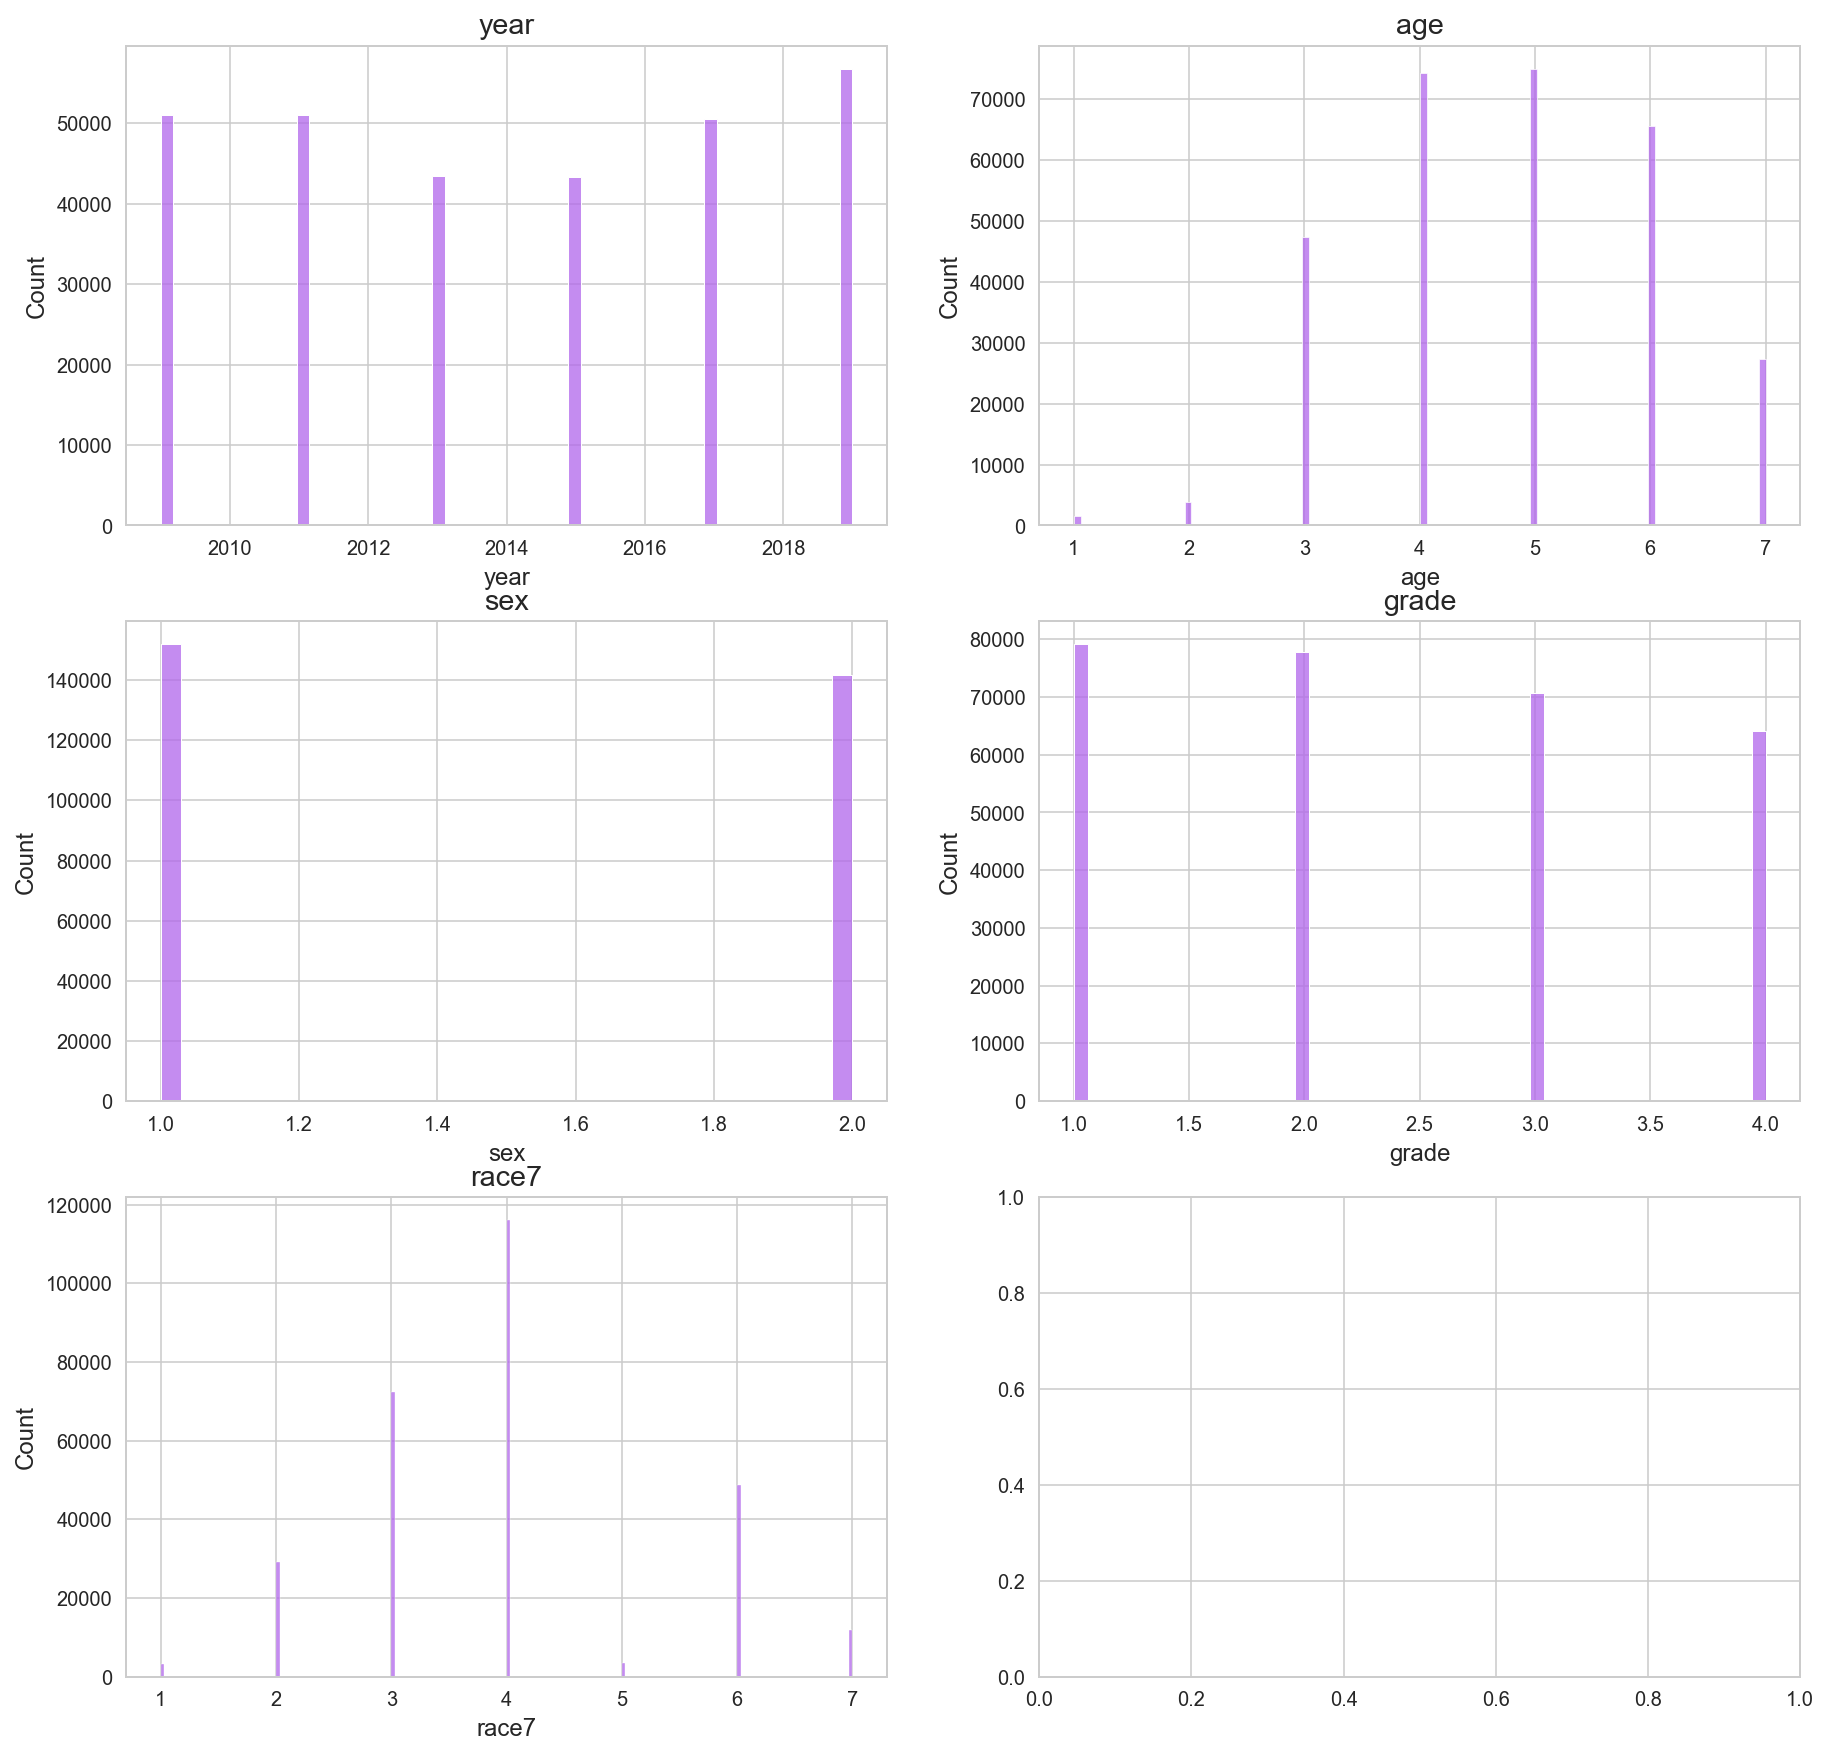

In [178]:
# Step 3: Filter Unwanted Outliers

fig, axs = plt.subplots(nrows = 3, ncols = 2)    # axes is 2d array (3x3)
axs = axs.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(15, 15)

for ax, col in zip(axs, sex_df.columns[1:6]):
    sns.histplot(sex_df[col], ax = ax)
    ax.set_title(col);

In [ ]:
# Step 4: Address Missing Values

In [179]:
# Drop features with more than 25% NaNs; 

sex_df.isnull().sum() / len(sex_df) * 100

sitename     0.000000
year         0.000000
age          0.344897
sex          0.829308
grade        1.451542
race7        3.790156
bmi         10.046955
q8          38.254569
q9          43.069621
q12          7.040503
q13         11.741715
q15          3.536128
q16          2.490288
q17          5.617674
q18         37.669493
q23          3.169273
q24         19.798331
q25          2.514610
q26          2.602101
q27         45.728136
q28         17.456339
q29         24.698510
q30         18.965983
q32          8.395433
q33         14.621829
q38         21.189406
q40         13.412154
q41         12.398068
q45         42.732831
q46          8.558592
q47          5.637266
q50          8.107286
q51         34.806945
q52         13.756376
q53         20.757356
q54         28.880857
q55         57.474918
q56         18.935581
q57         36.510489
q58         20.285106
q67         27.164139
q68         27.579975
q69         10.161132
q70          9.978718
q79         13.989461
q81       

In [180]:
to_drop_nans_2 = ['q9', 'q18', 'q23', 'q24', 'q27', 
                 'q38', 'q45', 'q51', 'q52', 'q53', 
                 'q54', 'q55', 'q56', 'q57', 'q67', 
                 'q68', 'q69', 'q70', 'q82', 'q87']

In [181]:
sex_df.drop(columns=to_drop_nans_2, inplace=True)

In [182]:
sex_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296030 entries, 3961 to 2226523
Data columns (total 28 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   sitename  296030 non-null  object 
 1   year      296030 non-null  int64  
 2   age       295009 non-null  float64
 3   sex       293575 non-null  float64
 4   grade     291733 non-null  float64
 5   race7     284810 non-null  float64
 6   bmi       266288 non-null  float64
 7   q8        182785 non-null  float64
 8   q12       275188 non-null  float64
 9   q13       261271 non-null  float64
 10  q15       285562 non-null  float64
 11  q16       288658 non-null  float64
 12  q17       279400 non-null  float64
 13  q25       288586 non-null  float64
 14  q26       288327 non-null  float64
 15  q28       244354 non-null  float64
 16  q29       222915 non-null  float64
 17  q30       239885 non-null  float64
 18  q32       271177 non-null  float64
 19  q33       252745 non-null  float64
 20  

In [183]:
sex_df.year.value_counts()

2019    56770
2011    51038
2009    50964
2017    50490
2013    43482
2015    43286
Name: year, dtype: int64

In [184]:
sex_df.isnull().sum() / len(sex_df) * 100

sitename     0.000000
year         0.000000
age          0.344897
sex          0.829308
grade        1.451542
race7        3.790156
bmi         10.046955
q8          38.254569
q12          7.040503
q13         11.741715
q15          3.536128
q16          2.490288
q17          5.617674
q25          2.514610
q26          2.602101
q28         17.456339
q29         24.698510
q30         18.965983
q32          8.395433
q33         14.621829
q40         13.412154
q41         12.398068
q46          8.558592
q47          5.637266
q50          8.107286
q58         20.285106
q79         13.989461
q81         22.533189
dtype: float64

#### For Target 1, q58

In [185]:
sex = sex_df.dropna(subset=['q58'])

In [186]:
sex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235980 entries, 7354 to 2226523
Data columns (total 28 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   sitename  235980 non-null  object 
 1   year      235980 non-null  int64  
 2   age       235371 non-null  float64
 3   sex       234981 non-null  float64
 4   grade     233484 non-null  float64
 5   race7     228751 non-null  float64
 6   bmi       215210 non-null  float64
 7   q8        147368 non-null  float64
 8   q12       220991 non-null  float64
 9   q13       211469 non-null  float64
 10  q15       228243 non-null  float64
 11  q16       233261 non-null  float64
 12  q17       224112 non-null  float64
 13  q25       233282 non-null  float64
 14  q26       232842 non-null  float64
 15  q28       201038 non-null  float64
 16  q29       188064 non-null  float64
 17  q30       198716 non-null  float64
 18  q32       225701 non-null  float64
 19  q33       206649 non-null  float64
 20  

In [187]:
cols = sex.columns.tolist()

In [196]:
# Impute missing values with Most common response for each question... (mode)
for col in cols: 
    sex[col]=sex[col].fillna(sex[col].mode()[0])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [197]:
sex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235980 entries, 7354 to 2226523
Data columns (total 28 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   sitename  235980 non-null  object 
 1   year      235980 non-null  int64  
 2   age       235980 non-null  float64
 3   sex       235980 non-null  float64
 4   grade     235980 non-null  float64
 5   race7     235980 non-null  float64
 6   bmi       235980 non-null  float64
 7   q8        235980 non-null  float64
 8   q12       235980 non-null  float64
 9   q13       235980 non-null  float64
 10  q15       235980 non-null  float64
 11  q16       235980 non-null  float64
 12  q17       235980 non-null  float64
 13  q25       235980 non-null  float64
 14  q26       235980 non-null  float64
 15  q28       235980 non-null  float64
 16  q29       235980 non-null  float64
 17  q30       235980 non-null  float64
 18  q32       235980 non-null  float64
 19  q33       235980 non-null  float64
 20  

In [199]:
sex.q58.replace(to_replace={2.: 0}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [200]:
sex.q58.unique()

array([0., 1.])

In [201]:
sex.to_csv('data/sex.csv', index=False)

In [205]:
sex.sitename.unique()

array(['Clark County, NV (CC)', 'Chicago, IL (CH)',
       'Charlotte-Mecklenburg County, NC (CM)', 'Dallas, TX (DA)',
       'Duval County, FL (DU)', 'Broward County, FL (FT)',
       'Los Angeles, CA (LO)', 'Milwaukee, WI (ML)',
       'Miami-Dade County, FL (MM)', 'New York City, NY (NYC)',
       'Borough of Bronx, NY (NYG)', 'Borough of Brooklyn, NY (NYH)',
       'Borough of Manhattan, NY (NYI)', 'Borough of Queens, NY (NYJ)',
       'Borough of Staten Island, NY (NYK)', 'Orange County, FL (OL)',
       'Palm Beach County, FL (PB)', 'Philadelphia, PA (PH)',
       'San Diego, CA (SA)', 'San Bernardino, CA (SB)',
       'San Francisco, CA (SF)', 'Seattle, WA (SE)', 'Cleveland, OH (CE)',
       'Fort Worth, TX (FW)', 'Oakland, CA (OA)',
       'Shelby County, TN (ST)', 'Eaton Consortium, MI (EA)',
       'Genesee Consortium, MI (GE)', 'Gaston County, NC (GS)',
       'Hillsborough County, FL (HL)', 'Newark, NJ (NW)',
       'Portland, OR (PO)', 'Pasco County, FL (PS)',
       'Spar

In [208]:
sex.iloc[1]

sitename    Clark County, NV (CC)
year                         2009
age                           6.0
sex                           1.0
grade                         2.0
race7                         4.0
bmi                     18.954101
q8                            5.0
q12                           1.0
q13                           1.0
q15                           1.0
q16                           1.0
q17                           1.0
q25                           2.0
q26                           2.0
q28                           1.0
q29                           1.0
q30                           1.0
q32                           1.0
q33                           1.0
q40                           6.0
q41                           1.0
q46                           1.0
q47                           1.0
q50                           1.0
q58                           1.0
q79                           6.0
q81                           1.0
Name: 11894, dtype: object

#### Data Cleaning for Target 2: <br>
Target Q 25; During the past 12 months, did you ever feel so sad or hopeless almost every day for two weeks or more in a row that you stopped doing some usual activities? <br>
(Source for cleaning steps: https://www.tableau.com/learn/articles/what-is-data-cleaning)

In [41]:
df

,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,age,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
record,,,,,,,,,,,,,,,,,,,,,
3961,CC,"Clark County, NV (CC)",District,1,2009,10,37.210800,5,3,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
7354,CC,"Clark County, NV (CC)",District,1,2009,10,37.067600,14,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
11894,CC,"Clark County, NV (CC)",District,1,2009,10,73.895100,17,1,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
15058,CC,"Clark County, NV (CC)",District,1,2009,10,6.100596,35,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
20708,CC,"Clark County, NV (CC)",District,1,2009,10,104.764939,15,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226519,ST,"Shelby County, TN (ST)",District,1,2019,15,16.504785,12,1,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2226522,ST,"Shelby County, TN (ST)",District,1,2019,15,9.973000,12,1,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2226521,ST,"Shelby County, TN (ST)",District,1,2019,15,16.504785,12,1,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df.q25.unique()

array([ 1.,  2., nan])

In [43]:
# Replace 2's (No's...) with 0s so that 1 (Yes) is the positive class
df.q25.replace(to_replace={2.: 0}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [44]:
df.sitename.unique()

array(['Clark County, NV (CC)', 'Chicago, IL (CH)',
       'Charlotte-Mecklenburg County, NC (CM)', 'Dallas, TX (DA)',
       'Duval County, FL (DU)', 'Broward County, FL (FT)',
       'Los Angeles, CA (LO)', 'Milwaukee, WI (ML)',
       'Miami-Dade County, FL (MM)', 'New York City, NY (NYC)',
       'Borough of Bronx, NY (NYG)', 'Borough of Brooklyn, NY (NYH)',
       'Borough of Manhattan, NY (NYI)', 'Borough of Queens, NY (NYJ)',
       'Borough of Staten Island, NY (NYK)', 'Orange County, FL (OL)',
       'Palm Beach County, FL (PB)', 'Philadelphia, PA (PH)',
       'San Diego, CA (SA)', 'San Bernardino, CA (SB)',
       'Seattle, WA (SE)', 'San Francisco, CA (SF)', 'Cleveland, OH (CE)',
       'Fort Worth, TX (FW)', 'Oakland, CA (OA)',
       'Shelby County, TN (ST)', 'Albuquerque, NM (AB)',
       'Eaton Consortium, MI (EA)', 'Genesee Consortium, MI (GE)',
       'Gaston County, NC (GS)', 'Hillsborough County, FL (HL)',
       'Newark, NJ (NW)', 'Portland, OR (PO)', 'Pasco County

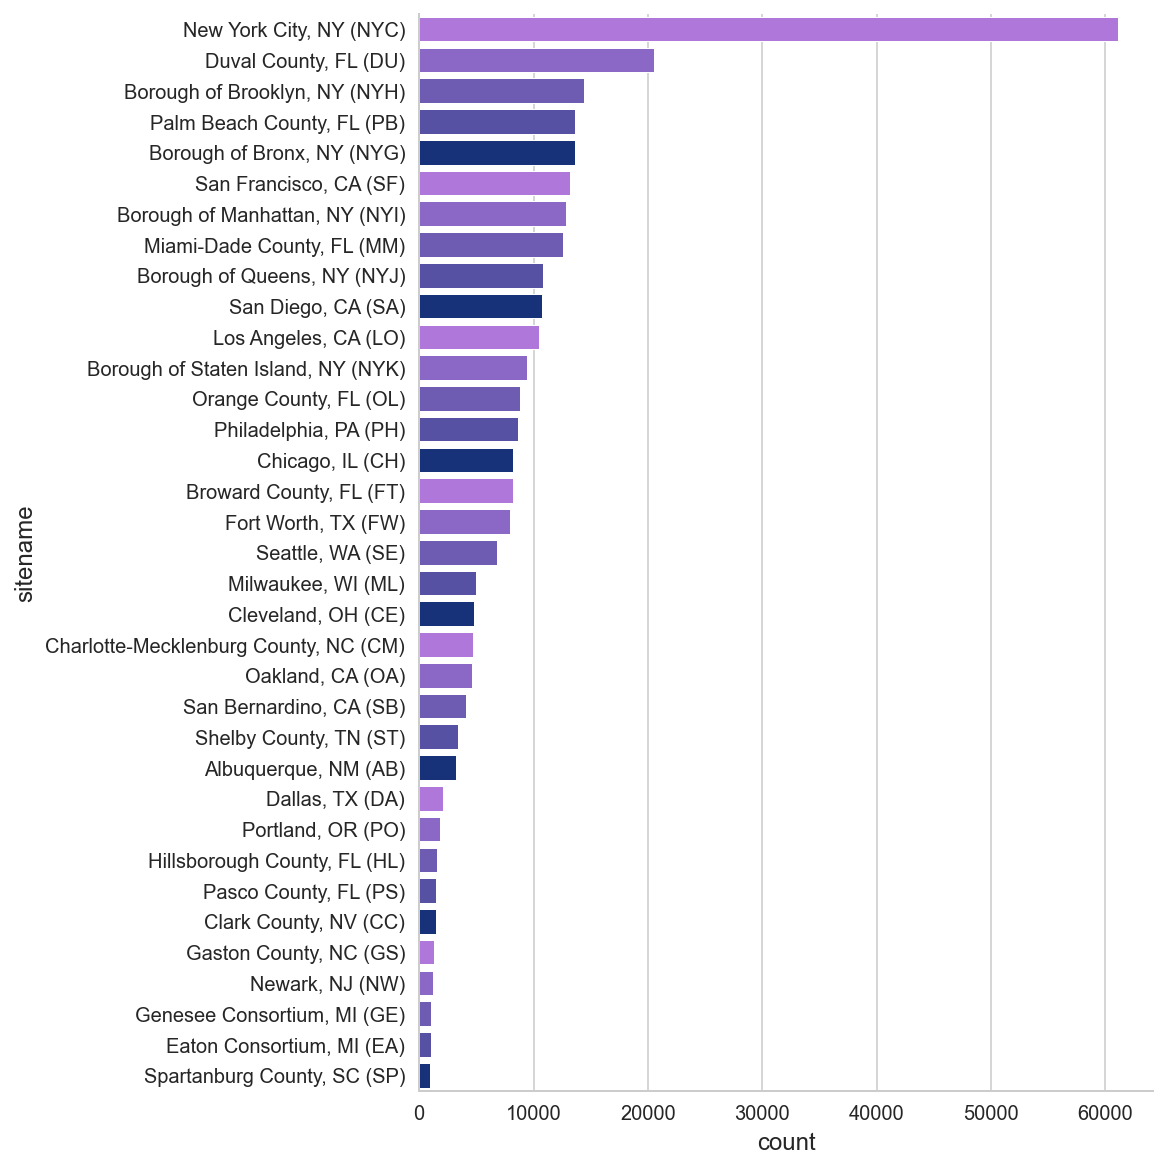

In [45]:
g = sns.catplot(data=df, y='sitename', kind='count', palette=colors, order=df['sitename'].value_counts().index, 
           height=8)

In [46]:
# Step 1: Manually Removing Features

In [47]:
sad_df = df.copy()

In [48]:
sad_df.race4.isnull().sum(), sad_df.race7.isnull().sum()

(11220, 11220)

In [49]:
# Step 1a : Remove Irrelevant features

to_drop = ['sitecode', 'race4',
 'sitetype',
 'sitetypenum',
 'survyear',
 'weight',
 'stratum',
 'PSU',
 'stheight',
 'stweight',
 'bmipct',
 'qnobese',
 'qnowt',
 'q66', 
#            66 = sex identity
 'q65',
#            65 = who have you had sex contact with
 'sexid',
           'sexid2',
 'sexpart',
 'sexpart2',
 'qbikehelmet',
 'qdrivemarijuana',
 'qcelldriving',
 'qpropertydamage',
 'qbullyweight',
 'qbullygender',
 'qbullygay',
 'qchokeself',
 'qcigschool',
 'qchewtobschool',
 'qalcoholschool',
 'qtypealcohol2',
 'qhowmarijuana',
 'qmarijuanaschool',
 'qcurrentopioid',
 'qcurrentcocaine',
 'qcurrentheroin',
 'qcurrentmeth',
 'qhallucdrug',
 'qprescription30d',
 'qgenderexp',
 'qtaughtHIV',
 'qtaughtsexed',
 'qtaughtstd',
 'qtaughtcondom',
 'qtaughtbc',
 'qdietpop',
 'qcoffeetea',
 'qsportsdrink',
 'qenergydrink',
 'qsugardrink',
 'qwater',
 'qfastfood',
 'qfoodallergy',
 'qwenthungry',
 'qmusclestrength',
 'qsunscreenuse',
 'qindoortanning',
 'qsunburn',
 'qconcentrating',
 'qcurrentasthma',
 'qwheresleep',
 'qspeakenglish',
 'qtransgender']

In [51]:
sad_df.drop(columns=to_drop, inplace=True)

In [52]:
# Step 1b. Remove Features with High NaNs

In [59]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
sad_df.isnull().sum() / len(sad_df) * 100

sitename     0.000000
year         0.000000
age          0.344897
sex          0.829308
grade        1.451542
race7        3.790156
bmi         10.046955
q8          38.254569
q9          43.069621
q10         54.434686
q11         54.560686
q12          7.040503
q13         11.741715
q14         70.110124
q15          3.536128
q16          2.490288
q17          5.617674
q18         37.669493
q19         30.025673
q20         75.147113
q21         43.013546
q22         39.362565
q23          3.169273
q24         19.798331
q25          2.514610
q26          2.602101
q27         45.728136
q28         17.456339
q29         24.698510
q30         18.965983
q31         76.376043
q32          8.395433
q33         14.621829
q34         64.000270
q35         54.316792
q36         78.430902
q37         75.169071
q38         21.189406
q39         84.511705
q40         13.412154
q41         12.398068
q42         68.803162
q43         58.041753
q44         27.878931
q45         42.732831
q46       

In [63]:
to_drop_nans = ['q10', 'q11', 'q14', 'q18', 'q19', 'q20', 'q21', 'q22', 'q27',
                'q28', 'q29',
               'q31', 'q34', 'q35', 'q36', 'q37', 'q39', 'q42', 'q43', 
               'q44', 'q48', 'q49', 'q55', 'q71', 'q72', 'q73', 
               'q74', 'q76', 'q77', 'q80', 
               'q83', 'q85', 'q86']

In [64]:
sad_df.drop(columns=to_drop_nans, inplace=True)

In [65]:
sad_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296030 entries, 3961 to 2226523
Data columns (total 54 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   sitename  296030 non-null  object 
 1   year      296030 non-null  int64  
 2   age       295009 non-null  float64
 3   sex       293575 non-null  float64
 4   grade     291733 non-null  float64
 5   race7     284810 non-null  float64
 6   bmi       266288 non-null  float64
 7   q8        182785 non-null  float64
 8   q9        168531 non-null  float64
 9   q12       275188 non-null  float64
 10  q13       261271 non-null  float64
 11  q15       285562 non-null  float64
 12  q16       288658 non-null  float64
 13  q17       279400 non-null  float64
 14  q23       286648 non-null  float64
 15  q24       237421 non-null  float64
 16  q25       288586 non-null  float64
 17  q26       288327 non-null  float64
 18  q30       239885 non-null  float64
 19  q32       271177 non-null  float64
 20  

In [66]:
# Step 1c: Remove Highly Correlated Features
corr = sad_df.corr()

<AxesSubplot:>

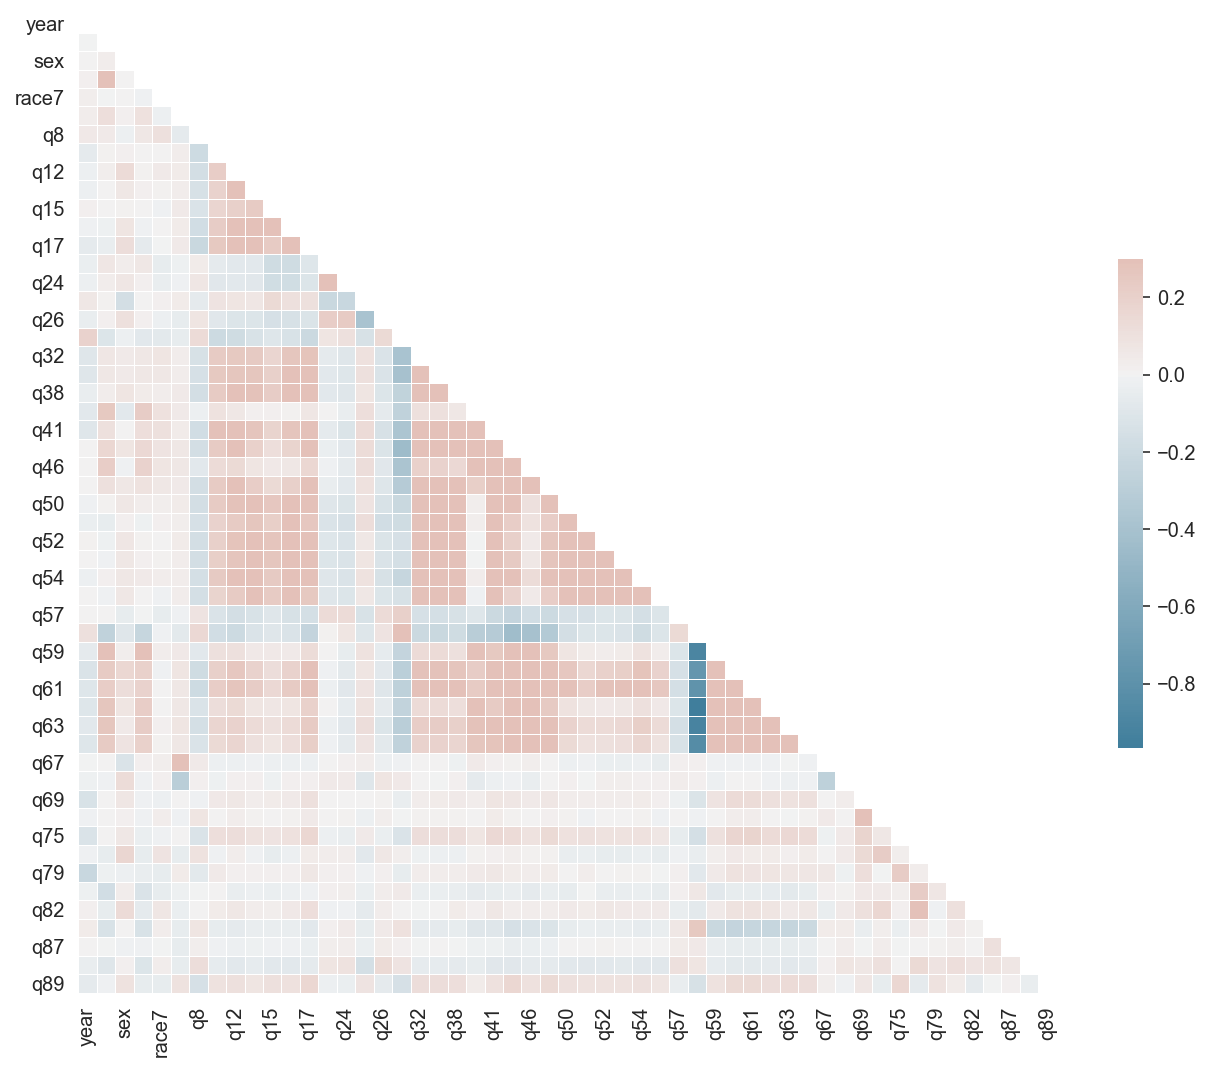

In [67]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [68]:
# More corr features are different enough to keep in for prediction
corr.q25.sort_values(ascending=False)

q25      1.000000
q15      0.146077
q41      0.139942
q45      0.127220
q51      0.124477
q46      0.124457
q63      0.123044
q40      0.113256
q16      0.109592
q33      0.102877
q17      0.102636
q47      0.101390
q32      0.099291
q54      0.090927
q62      0.089326
q59      0.088554
q64      0.086994
q61      0.086938
q89      0.085642
q9       0.085586
q50      0.085368
q12      0.078341
q38      0.078263
q53      0.074016
q60      0.072790
q13      0.069690
q56      0.066021
q52      0.065980
year     0.059610
q75      0.046436
bmi      0.040507
q67      0.034222
race7    0.021517
age      0.011488
grade    0.006988
q69      0.001679
q79     -0.014990
q70     -0.022646
q87     -0.034014
q81     -0.034593
q84     -0.052622
q82     -0.061535
q8      -0.062827
q78     -0.079704
q68     -0.098339
q58     -0.102865
q57     -0.130777
q30     -0.144418
q88     -0.154575
sex     -0.164968
q23     -0.213465
q24     -0.220242
q26     -0.392263
Name: q25, dtype: float64

In [70]:
# Step 2: Fix Structural Errors (Race 7 + Race 4 -- 7 has a few more nans but more specific information)
sad_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296030 entries, 3961 to 2226523
Data columns (total 54 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   sitename  296030 non-null  object 
 1   year      296030 non-null  int64  
 2   age       295009 non-null  float64
 3   sex       293575 non-null  float64
 4   grade     291733 non-null  float64
 5   race7     284810 non-null  float64
 6   bmi       266288 non-null  float64
 7   q8        182785 non-null  float64
 8   q9        168531 non-null  float64
 9   q12       275188 non-null  float64
 10  q13       261271 non-null  float64
 11  q15       285562 non-null  float64
 12  q16       288658 non-null  float64
 13  q17       279400 non-null  float64
 14  q23       286648 non-null  float64
 15  q24       237421 non-null  float64
 16  q25       288586 non-null  float64
 17  q26       288327 non-null  float64
 18  q30       239885 non-null  float64
 19  q32       271177 non-null  float64
 20  

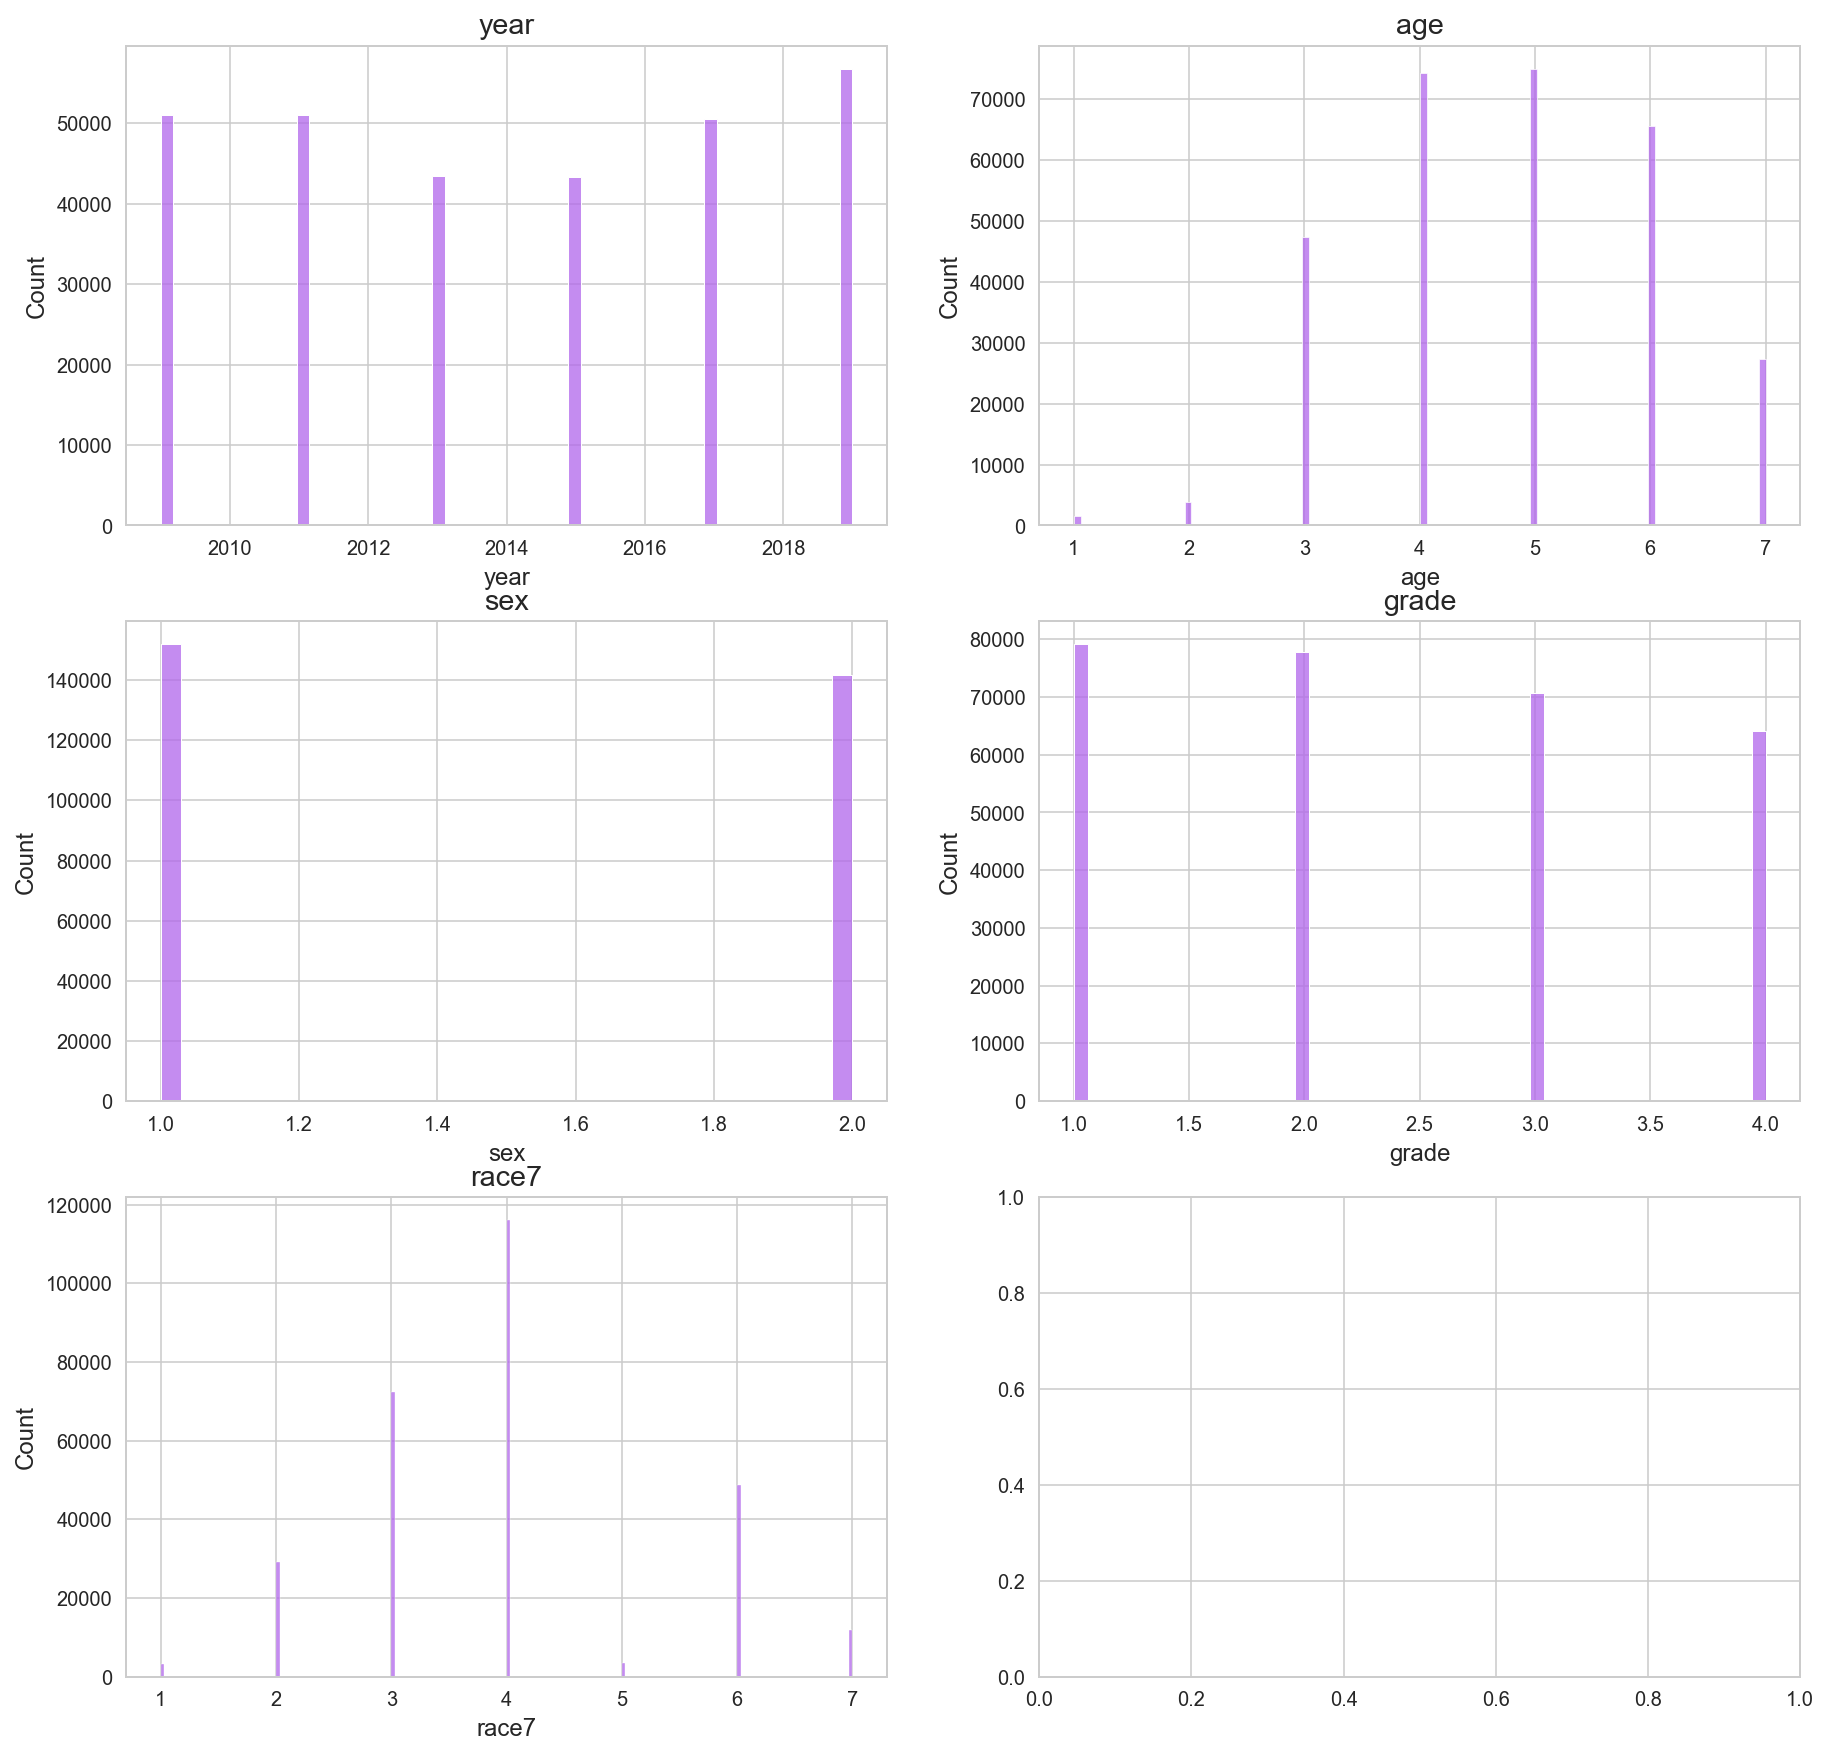

In [72]:
# Step 3: Filter Unwanted Outliers

fig, axs = plt.subplots(nrows = 3, ncols = 2)    # axes is 2d array (3x3)
axs = axs.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(15, 15)

for ax, col in zip(axs, sad_df.columns[1:6]):
    sns.histplot(sad_df[col], ax = ax)
    ax.set_title(col);

In [73]:
# Step 4: Address Missing Values

In [74]:
# Drop features with more than 25% NaNs; 

sad_df.isnull().sum() / len(sad_df) * 100

sitename     0.000000
year         0.000000
age          0.344897
sex          0.829308
grade        1.451542
race7        3.790156
bmi         10.046955
q8          38.254569
q9          43.069621
q12          7.040503
q13         11.741715
q15          3.536128
q16          2.490288
q17          5.617674
q23          3.169273
q24         19.798331
q25          2.514610
q26          2.602101
q30         18.965983
q32          8.395433
q33         14.621829
q38         21.189406
q40         13.412154
q41         12.398068
q45         42.732831
q46          8.558592
q47          5.637266
q50          8.107286
q51         34.806945
q52         13.756376
q53         20.757356
q54         28.880857
q56         18.935581
q57         36.510489
q58         20.285106
q59         18.234301
q60         20.328007
q61         19.716583
q62         19.600378
q63         20.217883
q64         21.365402
q67         27.164139
q68         27.579975
q69         10.161132
q70          9.978718
q75       

In [75]:
to_drop_nans_2 = ['q8', 'q9', 'q45', 'q51',
                 'q54', 'q57', 'q67', 
                 'q68', 'q82', 'q84', 'q88', 'q89']

In [76]:
sad_df.drop(columns=to_drop_nans_2, inplace=True)

In [77]:
sad_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296030 entries, 3961 to 2226523
Data columns (total 42 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   sitename  296030 non-null  object 
 1   year      296030 non-null  int64  
 2   age       295009 non-null  float64
 3   sex       293575 non-null  float64
 4   grade     291733 non-null  float64
 5   race7     284810 non-null  float64
 6   bmi       266288 non-null  float64
 7   q12       275188 non-null  float64
 8   q13       261271 non-null  float64
 9   q15       285562 non-null  float64
 10  q16       288658 non-null  float64
 11  q17       279400 non-null  float64
 12  q23       286648 non-null  float64
 13  q24       237421 non-null  float64
 14  q25       288586 non-null  float64
 15  q26       288327 non-null  float64
 16  q30       239885 non-null  float64
 17  q32       271177 non-null  float64
 18  q33       252745 non-null  float64
 19  q38       233303 non-null  float64
 20  

In [78]:
sad_df.year.value_counts()

2019    56770
2011    51038
2009    50964
2017    50490
2013    43482
2015    43286
Name: year, dtype: int64

#### For Target 2, q25

In [81]:
sad = sad_df.dropna(subset=['q25'])

In [82]:
sad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288586 entries, 3961 to 2226523
Data columns (total 42 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   sitename  288586 non-null  object 
 1   year      288586 non-null  int64  
 2   age       287786 non-null  float64
 3   sex       286899 non-null  float64
 4   grade     284916 non-null  float64
 5   race7     278694 non-null  float64
 6   bmi       260642 non-null  float64
 7   q12       269942 non-null  float64
 8   q13       256472 non-null  float64
 9   q15       279467 non-null  float64
 10  q16       282094 non-null  float64
 11  q17       273761 non-null  float64
 12  q23       281842 non-null  float64
 13  q24       233046 non-null  float64
 14  q25       288586 non-null  float64
 15  q26       284588 non-null  float64
 16  q30       236642 non-null  float64
 17  q32       267072 non-null  float64
 18  q33       248698 non-null  float64
 19  q38       228161 non-null  float64
 20  

In [83]:
cols = sad.columns.tolist()

In [84]:
# Impute missing values with Most common response for each question... (mode)
for col in cols: 
    sad[col]=sad[col].fillna(sad[col].mode()[0])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
sad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288586 entries, 3961 to 2226523
Data columns (total 42 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   sitename  288586 non-null  object 
 1   year      288586 non-null  int64  
 2   age       288586 non-null  float64
 3   sex       288586 non-null  float64
 4   grade     288586 non-null  float64
 5   race7     288586 non-null  float64
 6   bmi       288586 non-null  float64
 7   q12       288586 non-null  float64
 8   q13       288586 non-null  float64
 9   q15       288586 non-null  float64
 10  q16       288586 non-null  float64
 11  q17       288586 non-null  float64
 12  q23       288586 non-null  float64
 13  q24       288586 non-null  float64
 14  q25       288586 non-null  float64
 15  q26       288586 non-null  float64
 16  q30       288586 non-null  float64
 17  q32       288586 non-null  float64
 18  q33       288586 non-null  float64
 19  q38       288586 non-null  float64
 20  

In [86]:
sad.q25.unique()

array([1., 0.])

In [87]:
sad.to_csv('data/sad.csv', index=False)